In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [26]:
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

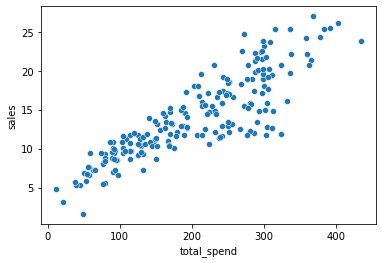

In [6]:
sns.scatterplot(data=df,x='total_spend',y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

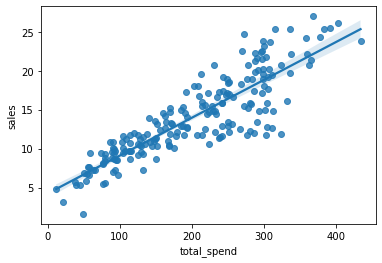

In [7]:
sns.regplot(data=df,x='total_spend',y='sales')

In [3]:
X = df['total_spend']
y = df['sales']

KeyError: 'total_spend'

In [9]:
#help(np.polyfit)
# y = mx+b
# y = B1x + B0

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [13]:
np.polyfit(X,y,deg=1)
# returning the equation of the linear Regression that approximates each sale if provided with a total_spend value
# the first degree
# y = B1x + B0
potential_spend = np.linspace(0,500,100)

In [14]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

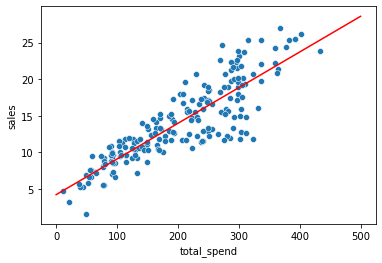

In [16]:
sns.scatterplot(data=df,y='sales',x='total_spend')
plt.plot(potential_spend,predicted_sales,color='red')

In [17]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
# y = B3x**3 + B2x**2 + B1x +B0
pot_spend = np.linspace(0,500,100)
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

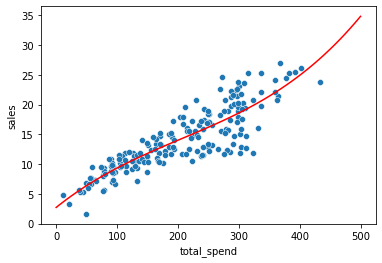

In [19]:
sns.scatterplot(data=df,y='sales',x='total_spend')
plt.plot(pot_spend,pred_sales,color='red')

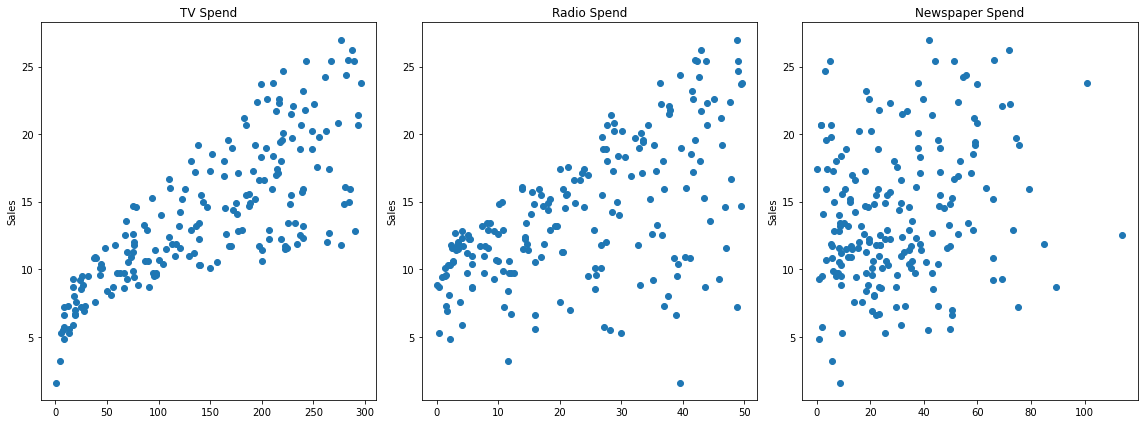

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"],df["sales"],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df["newspaper"],df['sales'],'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [25]:
#X = df.drop("sales",axis=1)

In [4]:
X = df.drop("sales",axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:
y = df["sales"]

In [6]:
from sklearn.model_selection import train_test_split

In [21]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [22]:
len(df)

200

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
#model.predict(X_test)

In [36]:
# the most common evaluation metrics for regression:
# Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error

In [26]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [27]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [28]:
test_predictions = model.predict(X_test)

In [29]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

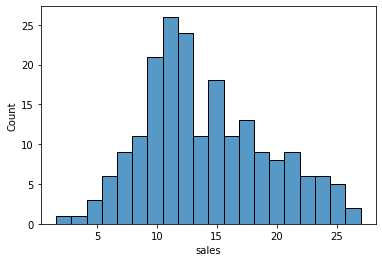

In [32]:
sns.histplot(data=df,x='sales',bins=20)

In [33]:
# comparing the predicted sale values of our model with the real values of sales
mean_absolute_error(y_test,test_predictions)

1.2137457736144808

In [34]:
mean_squared_error(y_test,test_predictions)

2.298716697886379

In [35]:
# root mean squared error RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993882

In [36]:
test_residuals = y_test - test_predictions
# in a perfect model the test_residuals would be zero for each data point

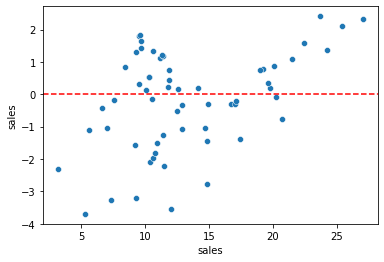

In [37]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

In [32]:
# the data seems to randomly distrisbuted around y=0 axis so there is no clear line or curve
# which makes the linear regression the suitable model for our the data set

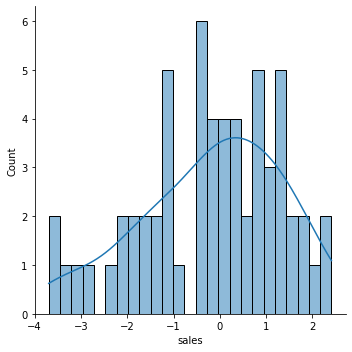

In [38]:
sns.displot(test_residuals,bins=25,kde=True)

In [39]:
# since we are satisfied with the performance(based on our mean absolute error , root mean squared error  ) of our model on our previous data set 
# we apply this model to other new data set
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [40]:
final_model.coef_
# returning the beta coefficients of each feature in our model

array([ 0.04576465,  0.18853002, -0.00103749])

In [41]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [37]:
# we notice that the beta coefficient of the newspaper is very small negative value which indicates that the advertising on newspaper has no influence on the amount of sales
# the scatterplot above shows us that the data points of  newspaper spend to sales are randomly scattered and we can't see any relationship the newspaper spend and the sales

In [38]:
# if we hold radio and newspaper spend fix und we increase the TV spend by 1 unit 
# the sales amount will increase by 0.04576 units .
# the same principle goes for all other features

In [42]:
from joblib import dump,load

In [43]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [44]:
loaded_model = load('final_sales_model.joblib')

In [45]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [46]:
X.shape

(200, 3)

In [47]:
# 149 TV , 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [48]:
loaded_model.predict(campaign)

array([13.893032])

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [51]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [52]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [53]:
polynomial_converter.transform(X).shape

(200, 9)

In [54]:
X.shape

(200, 3)

In [55]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [56]:
poly_features = polynomial_converter.transform(X)

In [57]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [58]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [73]:
model.fit(X_train,y_train)

LinearRegression()

In [74]:
test_predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [76]:
MAE = mean_absolute_error(y_test,test_predictions)

In [77]:
MSE = mean_squared_error(y_test,test_predictions)

In [78]:
RMSE = np.sqrt(MSE)

In [79]:
MAE

0.48967980448035353

In [80]:
RMSE

0.6646431757268949

In [81]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [83]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [84]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [85]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# PLOT the results (error vs poly order)

In [15]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [16]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.43393443569020673,
 0.35170836883993467,
 0.2509342963168562,
 0.20133513038009845,
 5.429519690630219,
 0.20829323347473921,
 0.17705794329531716]

In [17]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757268949,
 0.5803286825191997,
 0.5077742625811473,
 2.575820709711998,
 4.417531343659344,
 1368.3537494947786,
 4031.580690396981,
 99797.38688330933]

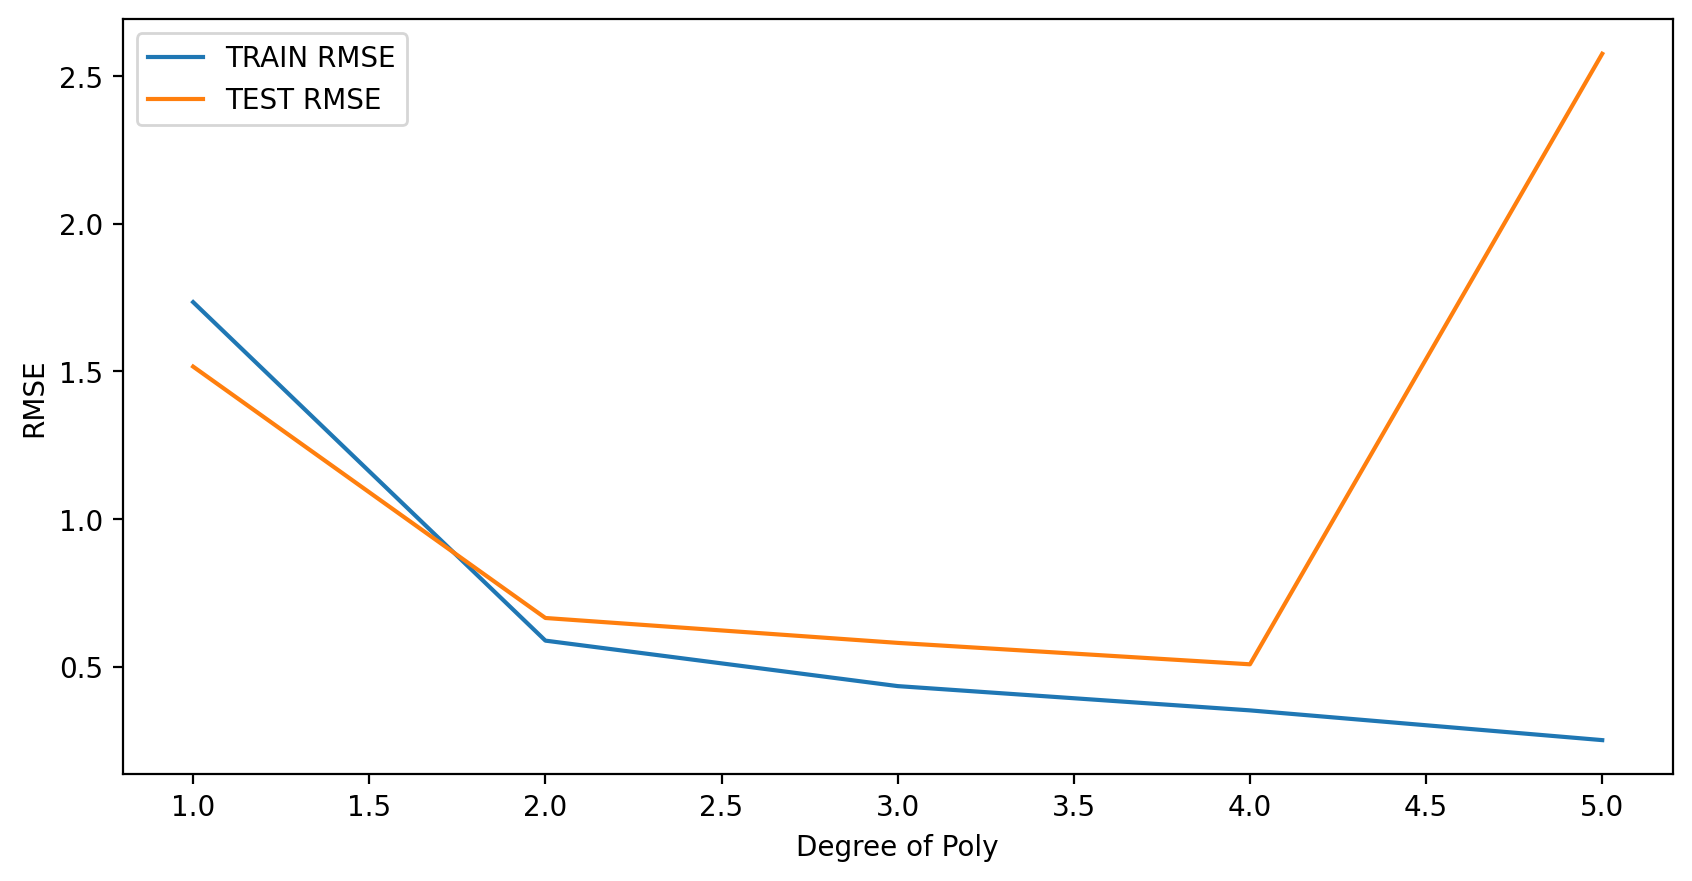

In [18]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [20]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [21]:
final_model = LinearRegression()

In [23]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [24]:
from joblib import dump,load

In [25]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [26]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [27]:
loaded_converter = load('final_converter.joblib')

In [28]:
loaded_model = load('final_poly_model.joblib')

In [31]:
campaign =[[149,22,12]]

In [32]:
transformed_data = loaded_converter.fit_transform(campaign)

In [33]:
transformed_data

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [34]:
transformed_data.shape

(1, 19)

In [36]:
loaded_model.predict(transformed_data)

array([14.64501014])

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [39]:
poly_features = polynomial_converter.fit_transform(X)

In [40]:
poly_features.shape

(200, 19)

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [45]:
X_train.shape

(140, 19)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(X_train)

StandardScaler()

In [49]:
X_train = scaler.transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

In [51]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [52]:
# the data values seems to be a bit smaller
# for comparison purposes we show the unscaled version of data
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [53]:
# Ridge Regression is a regularization technique that works by helping reduce
# the poltential for overfitting to the training data
# It does this by adding in a penalty term to the errors that is based on the squared
# value of the coefficients

In [54]:
from sklearn.linear_model import Ridge

In [56]:
ridge_model = Ridge(alpha=10)

In [57]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [58]:
test_predictions = ridge_model.predict(X_test)

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
MAE = mean_absolute_error(y_test,test_predictions)

In [61]:
MAE

0.5774404204714181

In [64]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [65]:
RMSE

0.8946386461319672

In [66]:
from sklearn.linear_model import RidgeCV

In [67]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [68]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [69]:
ridge_cv_model.alpha_

0.1

In [70]:
test_predictions = ridge_cv_model.predict(X_test)

In [71]:
MAE = mean_absolute_error(y_test,test_predictions)

In [72]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [73]:
MAE

0.4273774884347841

In [74]:
RMSE

0.6180719926950821

In [76]:
from sklearn.linear_model import LassoCV

In [79]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [80]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [82]:
lasso_cv_model.alpha_

0.49430709092258285

In [83]:
test_predictions = lasso_cv_model.predict(X_test)

In [84]:
MAE = mean_absolute_error(y_test,test_predictions)

In [85]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [86]:
MAE

0.6541723161252854

In [87]:
RMSE

1.1308001022762533

In [88]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [90]:
from sklearn.linear_model import ElasticNetCV

In [91]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],eps=0.001
                            ,n_alphas=100,max_iter=1000000)

In [92]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [94]:
elastic_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [95]:
elastic_model.l1_ratio_

1.0

In [97]:
elastic_model.alpha_

0.004943070909225827

In [98]:
#lasso_cv_model.alpha_

0.49430709092258285

In [99]:
test_predictions = elastic_model.predict(X_test)

In [100]:
MAE = mean_absolute_error(y_test,test_predictions)

In [101]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [102]:
MAE

0.43350346185900707

In [103]:
RMSE

0.6063140748984027

In [104]:
elastic_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])